In [ ]:
# cats-or-dogs classification model with CNN
# train : 1027 images [horse(1000) + human(1000)] , 
# validation : 256 images [horse(128) + human(128)] , 300*300 pixels

In [2]:
import tensorflow as tf
import urllib
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [ ]:
# cats-or-dogs 데이터셋 다운로드
_TRAIN_TEST_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
urllib.request.urlretrieve(_TRAIN_TEST_URL, 'cats_and_dogs_filtered.zip')

In [3]:
# 압축해제
local_zip = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/cats_and_dogs_filtered/')
zip_ref.close()

train_dir = 'tmp/cats_and_dogs_filtered/train'
validation_dir = 'tmp/cats_and_dogs_filtered/validation'

In [5]:
# 이미지 데이터 경로 설정
import os
# Directory with our training horse pictures
train_cats_dir = os.path.join('tmp/cats_and_dogs_filtered/train/cats')

# Directory with our training human pictures
train_dogs_dir = os.path.join('tmp/cats_and_dogs_filtered/train/dogs')

# Directory with our training horse pictures
validation_cats_dir = os.path.join('tmp/cats_and_dogs_filtered/validation/cats')

# Directory with our training human pictures
validation_dogs_dir = os.path.join('tmp/cats_and_dogs_filtered/validation/dogs')

train_cats_names= os.listdir(train_cats_dir)
# print(train_cats_names[:10])

train_dogs_names= os.listdir(train_dogs_dir)
# print(train_dogs_names[:10])


validation_cats_names = os.listdir(validation_cats_dir)
# print(validation_cats_hames[:10])

validation_dogs_names = os.listdir(validation_dogs_dir)
# print(validation_dogs_hames[:10])

<function matplotlib.pyplot.show(close=None, block=None)>

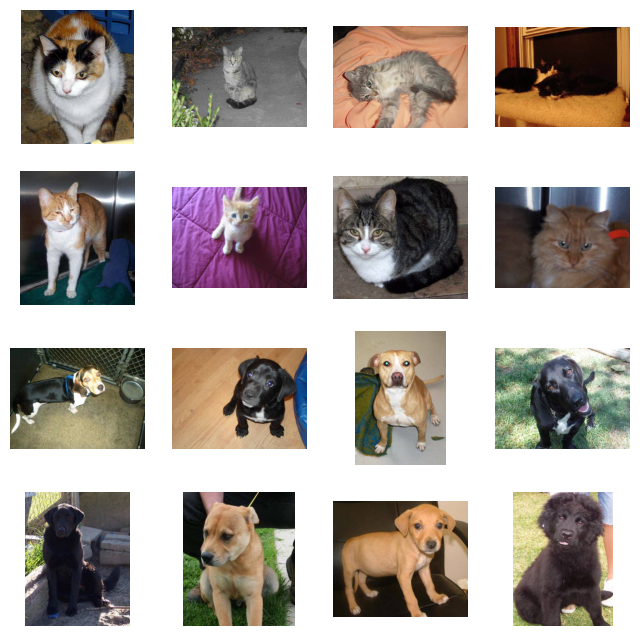

In [7]:
# 데이터 시각화 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 15  # 시작 인덱스

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*2, nrows*2)
pic_index += 8
next_cats_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cats_names[pic_index-8:pic_index]]
next_dogs_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dogs_names[pic_index-8:pic_index]]

# print(next_horse_pix)
# print(next_human_pix)

for i, img_path in enumerate(next_cats_pix+next_dogs_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes

    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show

## CNN 모델 구현

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics =['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 17, 17, 64)      

### 데이터 전처리 : 이미지 증강(Image Augmentation)

In [15]:
# from tensorflow.Keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                   )
validation_datagen = ImageDataGenerator(rescale=1./255.)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode = 'binary',
                                                    target_size =(150,150))
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                    batch_size=20,
                                                    class_mode = 'binary',
                                                    target_size =(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
# 학습
model.fit(train_generator,            # x
          steps_per_epoch= 100,        # 2000 / 20
          epochs=100,
          validation_steps=50,        # 1000 / 20
          verbose=1
         )   

Epoch 1/100
100/100 [==============================] - 8s 76ms/step - loss: 0.6116 - accuracy: 0.6765
Epoch 2/100
100/100 [==============================] - 7s 70ms/step - loss: 0.5803 - accuracy: 0.6885
Epoch 3/100
100/100 [==============================] - 7s 70ms/step - loss: 0.5992 - accuracy: 0.6860
Epoch 4/100
100/100 [==============================] - 7s 69ms/step - loss: 0.5836 - accuracy: 0.6950
Epoch 5/100
100/100 [==============================] - 7s 70ms/step - loss: 0.5888 - accuracy: 0.6970
Epoch 6/100
100/100 [==============================] - 7s 70ms/step - loss: 0.5761 - accuracy: 0.7045
Epoch 7/100
100/100 [==============================] - 7s 70ms/step - loss: 0.5773 - accuracy: 0.7045
Epoch 8/100
100/100 [==============================] - 7s 70ms/step - loss: 0.5621 - accuracy: 0.7045
Epoch 9/100
100/100 [==============================] - 7s 70ms/step - loss: 0.5581 - accuracy: 0.7295
Epoch 10/100
100/100 [==============================] - 7s 70ms/step - loss: 0.539

### 이미지 분류 예측